In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel("Fraud1.xlsx")
df.shape

(1048575, 11)

In [3]:
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0,0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0,0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0,0


In [4]:
df.tail(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048375,95,PAYMENT,9133.65,C1945471075,519.00,0.00,M1276666845,0.00,0.00,0,0
1048376,95,PAYMENT,15289.59,C801787845,4342.00,0.00,M228740872,0.00,0.00,0,0
1048377,95,PAYMENT,6833.21,C1389066319,10951.00,4117.79,M1573060416,0.00,0.00,0,0
1048378,95,PAYMENT,7560.80,C537601882,63265.00,55704.20,M1062139484,0.00,0.00,0,0
1048379,95,PAYMENT,13474.89,C911141114,55704.20,42229.31,M2084321676,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [7]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  1047433
Number of Fraud transactions:  1142
Percentage of Legit transactions: 99.8911 %
Percentage of Fraud transactions: 0.1089 %


_These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.89 % and Percentage of Fraud transactions= 0.108 %. SO DECISION TREES AND RANDOM FORESTS ARE GOOD METHODS FOR IMBALANCED DATA._

In [8]:
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


_For merchants there is no information regarding the attribites oldbalanceDest and newbalanceDest._

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

## VISUALISATION

##### CORRELATION HEATMAP

<Axes: >

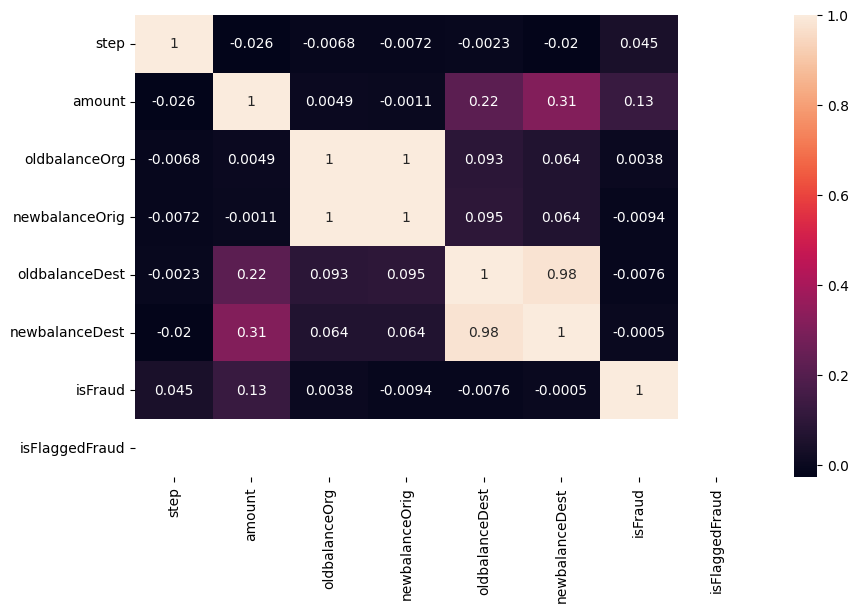

In [10]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

##### NUMBER OF LEGIT AND FRAUD TRANSACTIONS

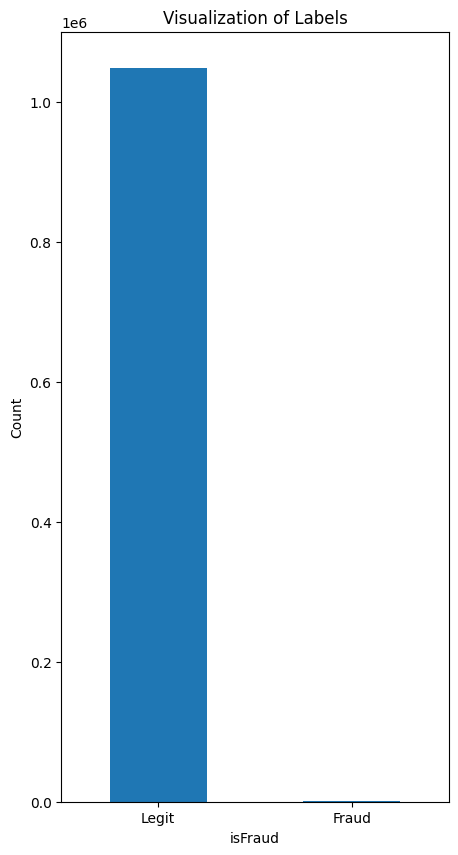

In [11]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

## PROBLEM SOLVING

In [12]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int32  
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  int32  
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  int32  
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 76.0 MB
None


In [15]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,0,0
1,1,3,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,0,0
2,1,4,181.00,165236,181.0,0.00,73550,0.0,0.0,1,0
3,1,1,181.00,961662,181.0,0.00,65464,21182.0,0.0,1,0
4,1,3,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,0,0


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

D:\Python\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,2.877927
1,type,5.056043
2,amount,2.126344
3,nameOrig,2.857378
4,oldbalanceOrg,711.471816
5,newbalanceOrig,718.671626
6,nameDest,3.823923
7,oldbalanceDest,38.438778
8,newbalanceDest,41.276657
9,isFraud,1.135086


We can see that oldbalanceOrg and newbalanceOrig have too high VIF(VARIANCE INFLATION FACTOR) thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [17]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

D:\Python\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,2.762942
1,amount,1.741103
2,isFraud,1.126054
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.282163
5,Actual_amount_dest,1.557138
6,TransactionPath,2.724984


<Axes: >

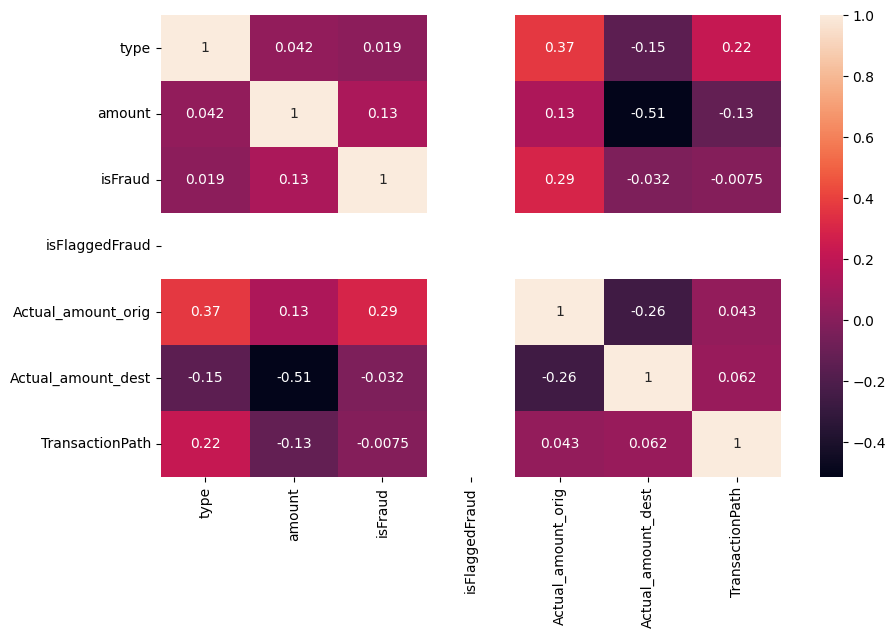

In [19]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

## MODEL BUILDING

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

##### NORMALIZING (SCALING) AMOUNT

In [21]:
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

I did not normalize the complete dataset because it may lead to decrease in accuracy of model.

##### TRAIN-TEST SPLIT

In [22]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (734002, 6)
Shape of X_test:  (314573, 6)


##### MODEL TRAINIG

In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [25]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

##### EVALUATION

In [26]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.91067256248947
Random Forest Score:  99.95613100933647


In [27]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 230
False Positives: 162
True Negatives: 314062
False Negatives: 119
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 232
False Positives: 21
True Negatives: 314203
False Negatives: 117


TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
FN(Decision Tree) ~ FN(Random Forest)

Here Random Forest looks good.

In [28]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[314062    162]
 [   119    230]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[314203     21]
 [   117    232]]


In [29]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.59      0.66      0.62       349

    accuracy                           1.00    314573
   macro avg       0.79      0.83      0.81    314573
weighted avg       1.00      1.00      1.00    314573

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.92      0.66      0.77       349

    accuracy                           1.00    314573
   macro avg       0.96      0.83      0.89    314573
weighted avg       1.00      1.00      1.00    314573



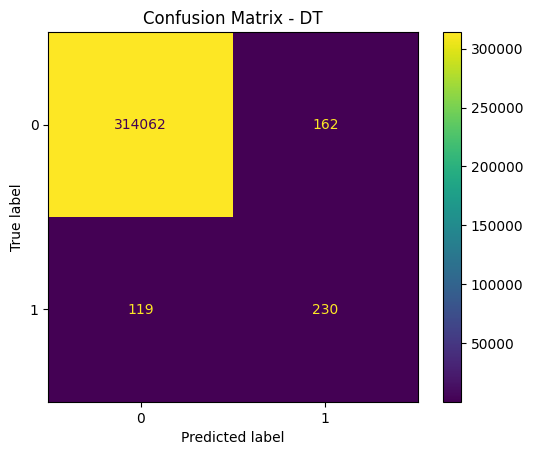

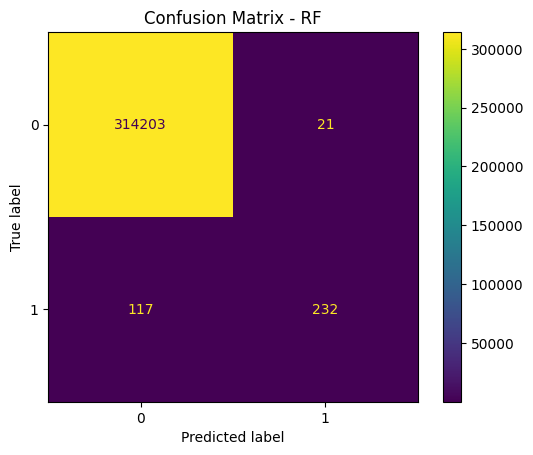

In [30]:
# visualising confusion matrix - DT

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

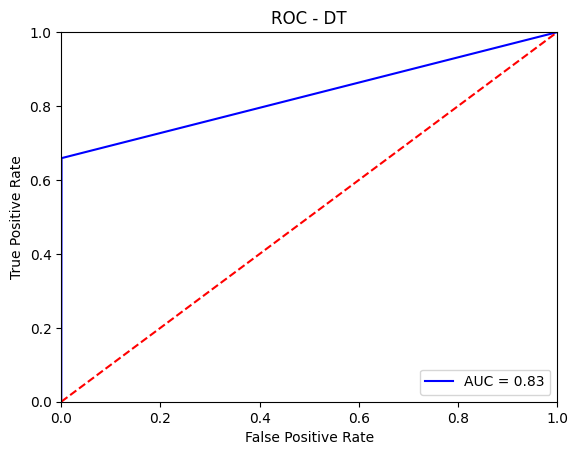

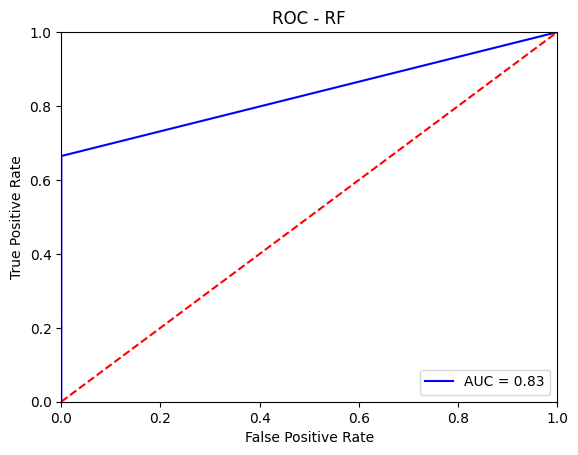

In [31]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

## CONCLUSION

We have observed that both the Random Forest and Decision Tree models exhibit the same accuracy, but the Random Forest model demonstrates higher precision. In the context of a fraud detection system, precision is particularly crucial because the priority is to correctly identify fraudulent transactions rather than merely predicting normal transactions accurately. Failing to meet this requirement could result in penalizing innocent individuals and letting actual fraudsters go undetected. This necessity underscores the preference for using Random Forest and Decision Tree models over other algorithms.

Another reason for selecting these models is the extremely imbalanced nature of the dataset, where legitimate transactions vastly outnumber fraudulent ones (Legit: Fraud :: 99.87:0.13). Random Forest, by creating multiple decision trees, provides a comprehensive approach that facilitates a more nuanced understanding of the data, despite being more time-consuming. This is advantageous over a single Decision Tree, which makes straightforward, binary decisions.

### What are the key factors that predict fraudulent customer? 

Here are the key factors that predict fraudulent customers, presented in a concise manner:

1. Unusual Transaction Patterns: Sudden changes in spending behavior, high-value transactions, or frequent transactions in a short time.
2. Location-Based Anomalies: Transactions from unexpected or inconsistent geographic locations.
3. High Transaction Frequency: Unusually high number of transactions within a short period.
4. Atypical Transaction Amounts: Transactions that deviate significantly from usual spending amounts.
5. New Account Activity: High transaction volumes in new accounts.
6. IP Address Changes: Transactions from IP addresses different from typical ones.
7. Device and Browser Changes: Use of new or unusual devices and browsers.
8. Frequent Personal Info Changes: Regular updates to personal details like address or phone number.
9. Odd Login Times: Logins at unusual hours.
10. Failed Login Attempts: Multiple unsuccessful login attempts.
11. New Payment Methods: Use of unfamiliar or multiple new payment methods.
12. Suspicious Connections: Links to known fraudulent accounts or patterns resembling past fraud cases.

By tracking these factors, companies can better predict and prevent fraudulent activities.

### Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense because they help identify deviations from normal behavior, which are often indicative of fraud:

1. Unusual Transaction Patterns: Sudden changes in spending.
2. Location-Based Anomalies: Transactions from unexpected locations.
3. High Transaction Frequency: Many transactions in a short period.
4. Atypical Transaction Amounts: Unusual spending amounts.
5. New Account Activity: High activity in new accounts.
6. IP Address Changes: Transactions from different IP addresses.
7. Device and Browser Changes: Use of new devices or browsers.
8. Frequent Personal Info Changes: Regular updates to personal details.
9. Odd Login Times: Logins at unusual hours.
10. Failed Login Attempts: Multiple unsuccessful logins.
11. New Payment Methods: Use of unfamiliar payment methods.
12. Suspicious Connections: Links to known fraud patterns.

Why These Factors Make Sense:

1. Anomalies Detection: Identify deviations from normal behavior.
2. Pattern Recognition: Use in machine learning models to detect fraud.
3. Preventive Measures: Enable timely interventions to prevent fraud.

### What kind of prevention should be adopted while company update its infrastructure?

When updating company infrastructure, the following preventive measures should be adopted:

1. Utilize only verified and trusted applications.
2. Ensure browsing is conducted through secure websites.
3. Use secure internet connections, such as a VPN, to protect data.
4. Regularly update security features on both mobile devices and laptops.
5. Avoid responding to unsolicited calls, SMS messages, or emails.
6. Immediately contact your bank if you suspect any security breach or if you feel you have been deceived.

### Assuming these actions have been implemented, how would you determine if they work?

To determine the effectiveness of these implemented actions, consider the following steps:

1. Ensure the bank sends regular e-statements to customers for transparency and monitoring.
2. Encourage customers to regularly review their account activity for any unauthorized transactions.
3. Maintain a detailed log of all payments to track and verify transactions.
4. Monitor for any decrease in security incidents or fraud reports as an indicator of improved security.
5. Conduct periodic security audits and assessments to evaluate the robustness of the infrastructure.
6. Solicit customer feedback regarding any suspicious activities or security concerns to address potential vulnerabilities promptly.